
=== Basic Evaluation Metrics ===
Test Accuracy: 0.9333

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Weighted Precision: 0.9345
Weighted Recall: 0.9333
Weighted F1-score: 0.9333

=== Cross-Validation Results ===
CV Accuracy Scores: [1.         0.96666667 0.9        1.         0.93333333]
Mean CV Accuracy: 0.9600
CV Accuracy Std Dev: 0.0389

ROC AUC Score (OvR): 0.9956


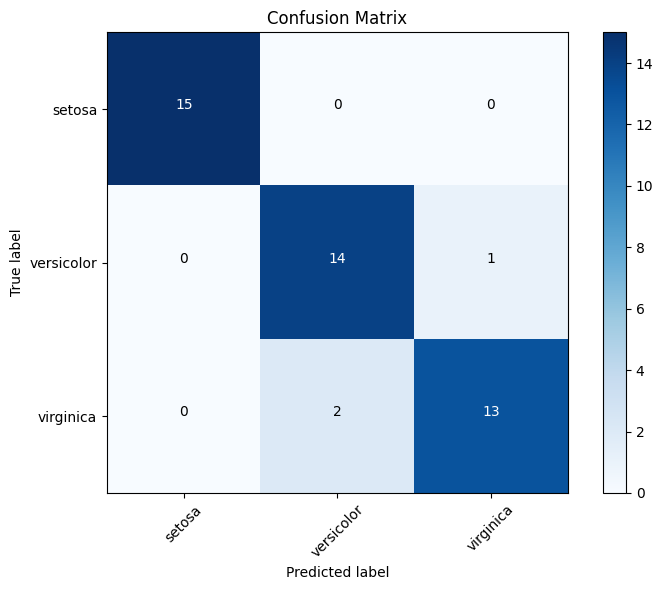

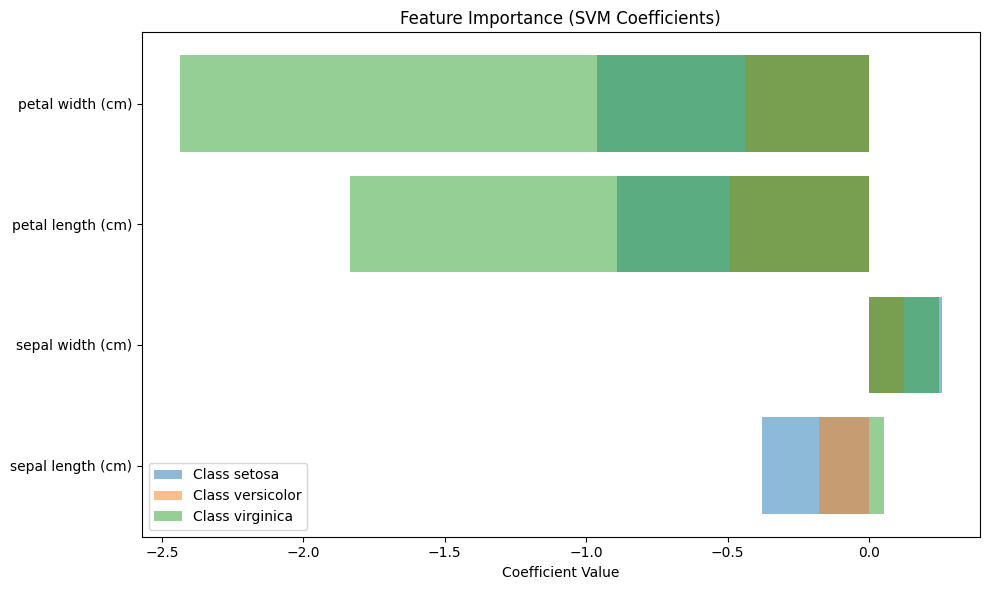

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

print("\n=== Basic Evaluation Metrics ===")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print("\n=== Cross-Validation Results ===")
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"CV Accuracy Std Dev: {np.std(cv_scores):.4f}")

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"\nROC AUC Score (OvR): {roc_auc:.4f}")

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names)
plt.show()

pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])
pipeline_linear.fit(X_train, y_train)

if pipeline_linear.named_steps['svm'].kernel == 'linear':
    coef = pipeline_linear.named_steps['svm'].coef_
    plt.figure(figsize=(10, 6))
    for i in range(len(class_names)):
        plt.barh(feature_names, coef[i], alpha=0.5, label=f'Class {class_names[i]}')
    plt.title("Feature Importance (SVM Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.legend()
    plt.tight_layout()
    plt.show()
